## Name: Aaron Eisenberg
## Course: 2021SU_MSDS_432-DL_SEC55
## Programming Assignment, Week 2 

In [2]:
import numpy as np
import pandas as pd 
import time 
from random import seed 
from random import random 
import matplotlib.pyplot as plt 

### Step 1 - Create five arrays with random integers and use random seed 

In [16]:
np.random.seed(15)

array1 = np.random.randint(1, int(1e5+1), int(10e3))
array2 = np.random.randint(1, int(1e5+1), int(20e3))
array3 = np.random.randint(1, int(1e5+1), int(30e3))
array4 = np.random.randint(1, int(1e5+1), int(40e3))
array5 = np.random.randint(1, int(1e5+1), int(50e3))

random_arrays = [array1, array2, array3, array4, array5]
array_lengths = [len(i) for i in random_arrays] 

In [22]:
# verification step 
print('Length array2:', len(array2)) 
print('min and max of array2:', (min(array2), max(array2))) 

Length array2: 20000
min and max of array2: (7, 99998)


### Step 2 - Sort the arrays using the Selection Sort algorithm

In [18]:
# first we set up function that determines the position of the minimum value in an array 

def index_smallest(unsorted_array):
    minimum = unsorted_array[0]              # take first value in array: this will be our min value to start with
    minimum_index = 0                        # define variable for index to start at zero 
    for i in range(1, len(unsorted_array)):  # for each value in the entire array after the first 
        if unsorted_array[i] < minimum:      # if the value at a particular position if less than the minimum
            minimum = unsorted_array[i]      # take the position of the new minimum 
            minimum_index = i                # define the position of the new minimum value 
    return minimum_index                     # return that new minimum value's position 

In [19]:
# verification step 
print(min(array1)) 
print(list(array1).index(min(array1))) 
print(index_smallest(array1))   # should yield the same position as previous print statement 

1
3696
3696


In [23]:
def selection_sort(unsorted_array):
    new_array = []                                     # create empty list for new array 
    unsorted_array = list(unsorted_array)
    for i in range(0, len(unsorted_array)):            # for each element in the entire unsorted array 
        smallest = index_smallest(unsorted_array)      # use funct'n in previous sect'n to find location of min value
        new_array.append(unsorted_array.pop(smallest)) # add min value to new end of new list and remove from unsorted array
    return new_array

In [24]:
# verification step 
print(selection_sort(array1)[0:5], '...', selection_sort(array1)[-5:])
print(len(selection_sort(array1)))

[1, 24, 41, 48, 64] ... [99938, 99958, 99967, 99985, 99997]
10000


### Step 3 - compare times for sorting arrays of different lengths 

In [49]:
# we will run each of the arrays through the following function for measuring time 
def timer(x):
    start_time = time.perf_counter() 
    selection_sort(x)
    end_time = time.perf_counter() 
    time_elapsed = round((end_time - start_time)*1000, 3)
    return time_elapsed 

# we will store the times in the list comprehension below 
sort_times = [timer(i) for i in random_arrays] 

In [50]:
df_sort = pd.DataFrame({'Array Length': array_lengths, 'Selection Sort Run Time (miliseconds)': sort_times}) 
df_sort.loc[:, 'Array Length'] = df_sort['Array Length'].map('{:,}'.format) 

#### Below are our results in a DataFrame 

In [51]:
df_sort

,Array Length,Selection Sort Run Time (miliseconds)
0,"10,000",3943.400
1,"20,000",15673.808
2,"30,000",35996.854
3,"40,000",64421.452
4,"50,000",100721.425


In the table above we can see that the relationship between the number of elements in the array and the time to sort using this algorithm is non-linear.  The relationship is not exaclty a quadratic (i.e. y=x^2) but it is very close to quadratice so we will approximate the relationship in the graph below.

### Step 4 - Plot Results 

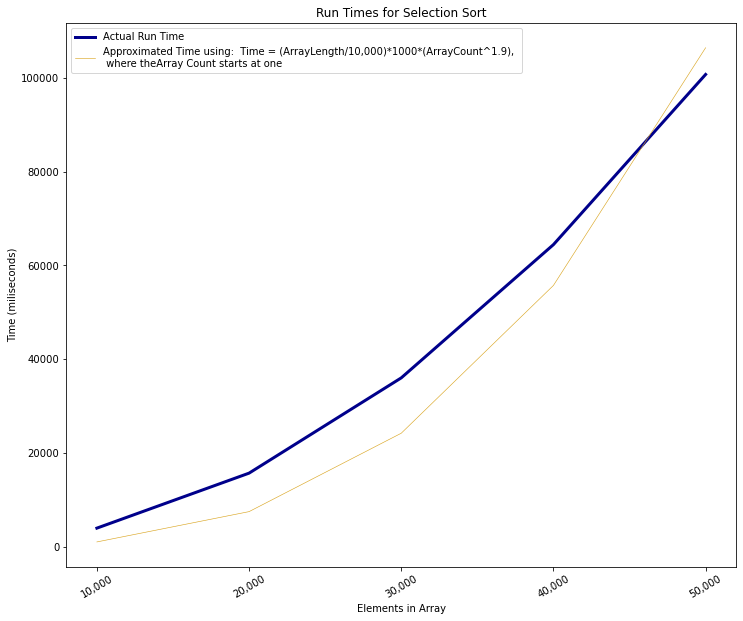

In [81]:
array_lengths_str = [str(i) for i in array_lengths] 
array_count = np.arange(1, 6, 1)
relation_approximation = [(i/10000)*1000*(j**1.9) for i,j in zip(array_lengths, array_count)] 

fig, ax = plt.subplots(figsize=(12, 10)) 

plt.xlabel('Elements in Array') 
plt.ylabel('Time (miliseconds)') 

plt.xticks(rotation=30) 

ax.plot(df_sort['Array Length'], df_sort['Selection Sort Run Time (miliseconds)'], 
        lw=3.0, color='darkblue', label='Actual Run Time') 
ax.plot(df_sort['Array Length'], relation_approximation, color='goldenrod', lw=0.6, 
        label='Approximated Time using:  Time = (ArrayLength/10,000)*1000*(ArrayCount^1.9), \n where the\
Array Count starts at one') 

plt.legend()
plt.title('Run Times for Selection Sort') 
plt.show(); 

### Summary 

The Selection Sort algorithm works by iterating through the array and finding the smallest value then placing that value in a new array.  The actual walkthrough of the steps are shown in the comments in the functions above.  

Because Selection Sort has to iterate through the entire array for each element it is somewhat slow.  The approximation formula is a slightly modified quadratic equation so this method of sorting is approximately O(n^2). 

This is important to data engineers because it highlights how an algorithm can be slow or fast for sorting.  One example that comes to mind would be a polical party that wants to sort or rank its registered members based on how much they have donated in the past.  This could be a very slow process if the proper algorithm is not used, and the process may need to be repeated frequently to obtain an updated ranking/list so speed is important.  